In [1]:
from time import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.metrics import accuracy_score

from mlnn import MLNN

In [2]:
data = load_digits()

X_original = np.array(data['data'])
Y_original = np.array(data['target'], dtype=int)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12345)
for train_index, test_index in split.split(X_original, Y_original):
    X_train, Y_train = X_original[train_index, :], Y_original[train_index]
    X_test, Y_test = X_original[test_index, :], Y_original[test_index]

pipeline = Pipeline([('std_scaler', StandardScaler())])
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

In [3]:
pca = PCA(n_components=2)
start_time = time()
X_train_pca = pca.fit_transform(X_train_scaled)
pca_time = time() - start_time
X_test_pca = pca.transform(X_test_scaled)

In [4]:
lda = LinearDiscriminantAnalysis(n_components=2)
start_time = time()
X_train_lda = lda.fit_transform(X_train_scaled, Y_train)
lda_time = time() - start_time
X_test_lda = lda.transform(X_test_scaled)

In [5]:
nca = NeighborhoodComponentsAnalysis(n_components=2)
start_time = time()
X_train_nca = nca.fit_transform(X_train_scaled, Y_train)
nca_time = time() - start_time
X_test_nca = nca.transform(X_test_scaled)

In [6]:
mlnn = MLNN(n_components=2)
start_time = time()
X_train_mlnn = mlnn.fit_transform(X_train_scaled, Y_train)
mlnn_time = time() - start_time
X_test_mlnn = mlnn.transform(X_test_scaled)

In [7]:
pca_knn = KNeighborsClassifier(3)
pca_knn.fit(X_train_pca, Y_train)
Y_test_pca = pca_knn.predict(X_test_pca)
pca_accuracy = accuracy_score(Y_test, Y_test_pca)

lda_knn = KNeighborsClassifier(3)
lda_knn.fit(X_train_lda, Y_train)
Y_test_lda = lda_knn.predict(X_test_lda)
lda_accuracy = accuracy_score(Y_test, Y_test_lda)

nca_knn = KNeighborsClassifier(3)
nca_knn.fit(X_train_nca, Y_train)
Y_test_nca = nca_knn.predict(X_test_nca)
nca_accuracy = accuracy_score(Y_test, Y_test_nca)

mlnn_knn = KNeighborsClassifier(3)
mlnn_knn.fit(X_train_mlnn, Y_train)
Y_test_mlnn = mlnn_knn.predict(X_test_mlnn)
mlnn_accuracy = accuracy_score(Y_test, Y_test_mlnn)

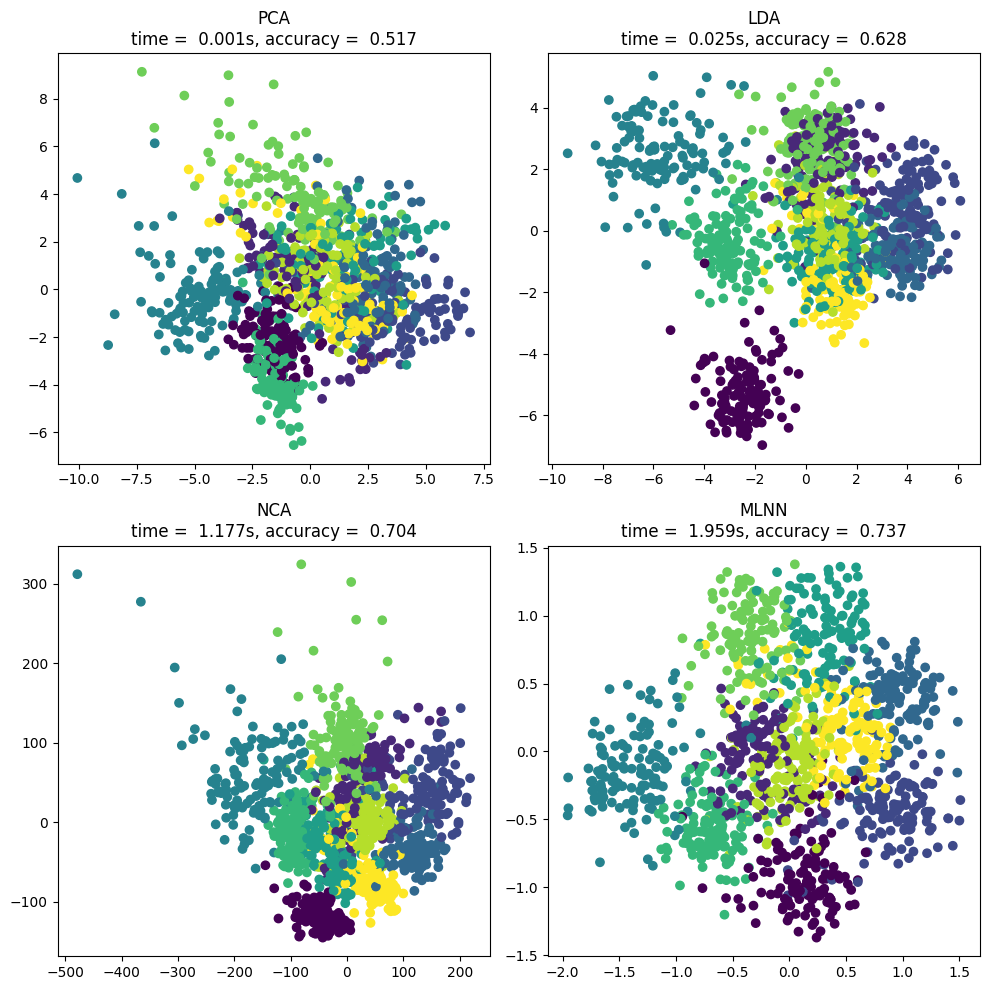

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

ax1.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train)
ax1.set_title(f"PCA\ntime = {pca_time: .3f}s, accuracy = {pca_accuracy: .3f}")

ax2.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=Y_train)
ax2.set_title(f"LDA\ntime = {lda_time: .3f}s, accuracy = {lda_accuracy: .3f}")

ax3.scatter(X_train_nca[:, 0], X_train_nca[:, 1], c=Y_train)
ax3.set_title(f"NCA\ntime = {nca_time: .3f}s, accuracy = {nca_accuracy: .3f}")

ax4.scatter(X_train_mlnn[:, 0], X_train_mlnn[:, 1], c=Y_train)
ax4.set_title(f"MLNN\ntime = {mlnn_time: .3f}s, accuracy = {mlnn_accuracy: .3f}")

fig.tight_layout()
plt.show()